# CMPS-320 Homework #1
Elijah Campbell-Ihim

9/25/23

## Directions:: Unsupervised techniques are often used in the analysis of genomic data. This project will illustrate the Hierarchical and K-means clustering.

### First, we must load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [2]:
cancerDF = pd.read_csv("NCI60_data.csv")
cancerTypes = pd.read_csv("NCI60_labs.csv")
cancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6831 entries, Unnamed: 0 to 6830
dtypes: float64(6830), object(1)
memory usage: 3.3+ MB


### Then we look at our data, get general info, check for missing values, etc.

In [3]:
cancerTypes.info()
cancerDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  64 non-null     int64 
 1   x           64 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [4]:
cancer2 = cancerDF.dropna()
cancer2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6831 entries, Unnamed: 0 to 6830
dtypes: float64(6830), object(1)
memory usage: 3.3+ MB


In [5]:
cancerTypes.tail()

,Unnamed: 0,x
59,60,MELANOMA
60,61,MELANOMA
61,62,MELANOMA
62,63,MELANOMA
63,64,MELANOMA


#### (a) How many observations and features are in the dataset?

There are 6830 features, and 64 observations 

#### (b) Are there any missing values?

There are no missing values, as the dropna() dataframe and original are the same size.

In [6]:
cancerDF = cancerDF.drop(cancerDF.columns[0], axis = 1)
cancerDF.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


## Directions:: Data preprocessing: Check to see if the data is standardized. If not, standardize the data matrix X so all variables are given a mean of zero and a standard deviation of one


### This data is not standardized, so I will standardize the data by using the Sci-Kit learn function StandardScaler(). This function will make the mean 0 and the std deviation 1.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to data 
scaler.fit(cancerDF)

# Transform data using the scaler to standardize it
cancer_standardized = scaler.transform(cancerDF)

#Look at new data details
cancerDF_std = pd.DataFrame(cancer_standardized)
cancerDF_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
count,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,...,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01
mean,2.775558e-17,-1.387779e-17,0.000000,3.122502e-17,-1.040834e-17,0.000000,2.775558e-17,2.775558e-17,1.734723e-17,-2.775558e-17,...,-2.428613e-17,2.775558e-17,-1.387779e-17,5.204170e-17,6.938894e-18,5.551115e-17,0.000000,2.775558e-17,-6.938894e-18,6.938894e-18
std,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,...,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905e+00
min,-2.377270e+00,-2.877193e+00,-3.931262,-2.105826e+00,-1.768435e+00,-2.032645,-2.555051e+00,-2.029547e+00,-2.115392e+00,-2.630141e+00,...,-2.004194e+00,-1.048700e+00,-1.298802e+00,-2.569869e+00,-2.344267e+00,-1.617887e+00,-1.767830,-2.014441e+00,-1.850851e+00,-1.985687e+00
25%,-8.071713e-01,-5.018980e-01,-0.401395,-9.173725e-01,-5.217310e-01,-0.468724,-7.230938e-01,-5.412910e-01,-8.472563e-01,-7.803041e-01,...,-6.570984e-01,-5.165919e-01,-5.595580e-01,-5.668481e-01,-5.245635e-01,-5.274250e-01,-0.577904,-7.115609e-01,-7.206783e-01,-8.304080e-01
50%,4.353664e-02,3.701052e-02,0.046342,3.033881e-01,-5.421676e-02,-0.019322,-5.352873e-02,6.883255e-02,-1.832542e-03,-3.022115e-02,...,9.005226e-02,-3.585180e-01,-2.652086e-01,-1.940283e-01,-1.590203e-01,-1.675724e-01,-0.075668,1.623610e-01,-2.312333e-01,-9.583766e-02
75%,7.515195e-01,5.060775e-01,0.424308,9.426144e-01,3.821298e-01,0.512757,6.194484e-01,5.451041e-01,6.909453e-01,7.042364e-01,...,4.352942e-01,1.401940e-01,1.145247e-01,2.907792e-01,3.165084e-01,1.868279e-01,0.036861,5.497099e-01,5.719101e-01,7.389014e-01
max,2.190290e+00,3.017748e+00,2.721339,1.687994e+00,3.509280e+00,3.317043,2.502375e+00,2.226625e+00,2.323083e+00,2.310550e+00,...,3.406828e+00,4.272379e+00,4.687052e+00,4.336512e+00,4.400030e+00,4.848555e+00,4.375607,3.440368e+00,3.381761e+00,2.535260e+00


## Directions:: Add an index name as “cancer type" to nci_data and make it appear as “cancertype" when clustering is applied

In [8]:
cancerDF_std["cancer type"] = cancerTypes["x"]
cancerDF_std.columns = cancerDF_std.columns.astype(str)
cancerDF_std.head()

,0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,cancer type
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675,CNS
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446,CNS
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838,CNS
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408,RENAL
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992,BREAST


# K-means clustering of our data
### Directions:: Perform K-means clustering and set random_state=123 and n_init=150.
### Create a cross table/contingency_table (use library pd.crosstab) to see how it is clustered according to the type of cancer.

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=123, n_init=150)

kmeans.fit(cancerDF_std.drop("cancer type", axis = 1))

cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### This is the crosstab of our clustering

In [10]:
contingency_table = pd.crosstab(cluster_labels, cancerDF_std["cancer type"])
print(contingency_table)

cancer type  BREAST  CNS  COLON  K562A-repro  K562B-repro  LEUKEMIA  \
row_0                                                                 
0                 0    0      0            0            0         0   
1                 0    0      6            0            0         1   
2                 2    5      0            0            0         0   
3                 1    0      1            0            0         1   
4                 0    0      0            1            1         2   
5                 2    0      0            0            0         0   
6                 0    0      0            0            0         2   
7                 2    0      0            0            0         0   

cancer type  MCF7A-repro  MCF7D-repro  MELANOMA  NSCLC  OVARIAN  PROSTATE  \
row_0                                                                       
0                      0            0         0      0        1         0   
1                      0            0         0      1    

# Now we have to do heirachrical clustering using Sci-Py

### Directions:: Now apply SciPy’s Hierarchical Clustering to all features. Use ’Euclidean’ as the Distance method and comment on how clustering differs according to complete, single, and average linkage.

In [11]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

### This is Hierrchical clustering using complete linkage

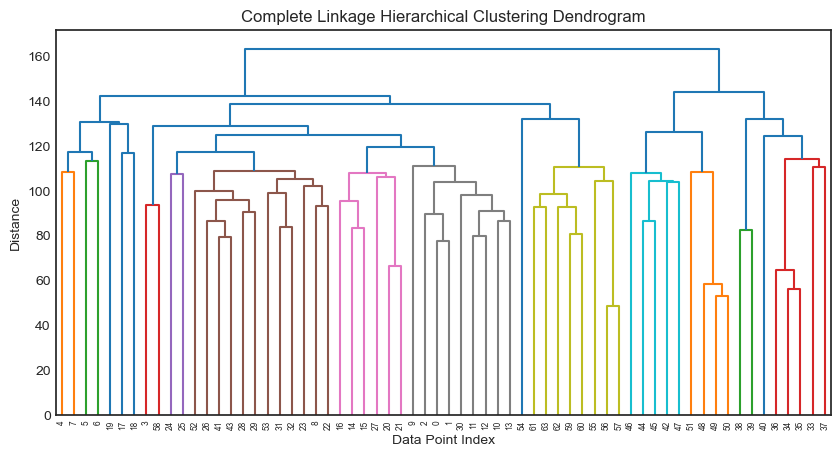

In [12]:
data = cancerDF_std.drop("cancer type", axis = 1)
complete_linkage_matrix = sch.linkage(data, method='complete', metric = 'euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(complete_linkage_matrix)
plt.title('Complete Linkage Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

### Average Linkage

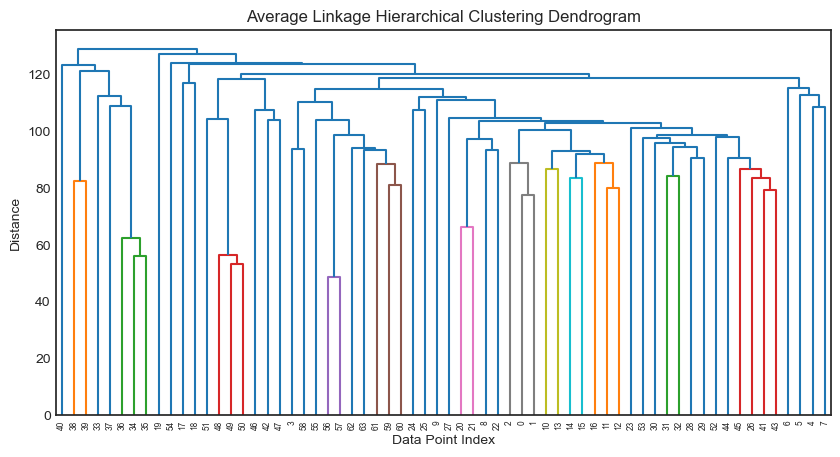

In [13]:

average_linkage_matrix = sch.linkage(data, method='average', metric = 'euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram2 = sch.dendrogram(average_linkage_matrix)
plt.title('Average Linkage Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

### And single linkage 

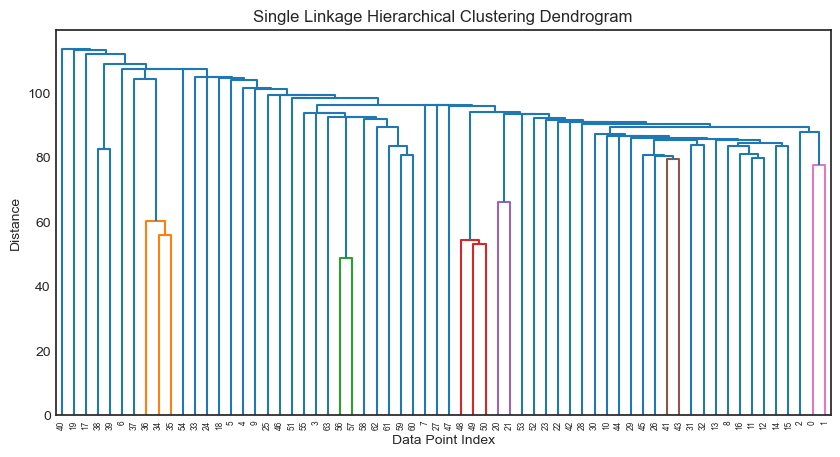

In [14]:

single_linkage_matrix = sch.linkage(data, method='single', metric = 'euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram3 = sch.dendrogram(single_linkage_matrix)
plt.title('Single Linkage Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

## Which linkage produced better results?
### It appears that Complete Linkage produced the best results, as it has the most clear and well-spaced clusters, and has a reasonably close euclidean distance compared to the other options. The single linkage clusters are too small and too frequently merging, so they are hard to distinguish meaningfully. The average linkage clusters are slightly better, but still has too many smaller clusters merging at high distances. Complete linkage offers the most comprehensive clusters


### To find where the best place to cut is for the complete linkage clustering, we will need to know the heights of the clusters

In [15]:
cluster_heights = complete_linkage_matrix[:, 2]

# Print the cluster heights
print("Cluster Heights:")
for i, height in enumerate(cluster_heights, start=1):
    print(f"Cluster {i}: {height}")

Cluster Heights:
Cluster 1: 48.8267133287157
Cluster 2: 53.38504247370695
Cluster 3: 56.177193193684204
Cluster 4: 58.76451638419517
Cluster 5: 64.8402686162067
Cluster 6: 66.37640410331551
Cluster 7: 77.65500389931887
Cluster 8: 79.5034215086994
Cluster 9: 79.91302159185365
Cluster 10: 80.96951444503321
Cluster 11: 82.67933266220508
Cluster 12: 83.73617142786104
Cluster 13: 84.15381000762714
Cluster 14: 86.7263603170196
Cluster 15: 86.75227431211559
Cluster 16: 86.86119404209406
Cluster 17: 89.5980480488413
Cluster 18: 90.74210483323274
Cluster 19: 90.9180209785205
Cluster 20: 92.80805036721955
Cluster 21: 93.08695549284603
Cluster 22: 93.3646459760476
Cluster 23: 93.92999361755807
Cluster 24: 95.74768958085726
Cluster 25: 96.00505644815219
Cluster 26: 98.35305957880117
Cluster 27: 98.90372036573609
Cluster 28: 99.27310613513627
Cluster 29: 100.02640087934347
Cluster 30: 102.10870408896635
Cluster 31: 103.93058897173007
Cluster 32: 103.94648948094093
Cluster 33: 104.51192271121282
Clu

## Directions:: Using the linkage that produced “better" clustering results, cut the dendrogram at the height that will yield a particular number of clusters. How many clusters are obtained?
### It seems like the best place to cut the dendrogram will be at height 133. This will produce 5 clusters, which we will use for our clustering algorithm

In [16]:
#First we cut the Dendrogram
hier_cluster_labels = sch.fcluster(complete_linkage_matrix, t= 5, criterion='maxclust')

# Then we print cluster assignments and the contingency table
print("Cluster Assignments:")
print(hier_cluster_labels)
print("")
hier_contingency_table = pd.crosstab(hier_cluster_labels, cancerDF_std["cancer type"])
print(hier_contingency_table)

Cluster Assignments:
[2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5
 5 5 5 5 2 4 2 4 4 4 4 4 4 4 4 2 2 3 3 3 3 2 3 3 3 3 3]

cancer type  BREAST  CNS  COLON  K562A-repro  K562B-repro  LEUKEMIA  \
row_0                                                                 
1                 3    2      0            0            0         0   
2                 0    3      2            0            0         0   
3                 2    0      0            0            0         0   
4                 2    0      5            0            0         0   
5                 0    0      0            1            1         6   

cancer type  MCF7A-repro  MCF7D-repro  MELANOMA  NSCLC  OVARIAN  PROSTATE  \
row_0                                                                       
1                      0            0         0      1        0         0   
2                      0            0         2      7        6         2   
3                      0            0    

## In summary, we took a .csv data set, organized and standardized the data, and used k-means and hierarchical clustering to cluster the data. In order for us to effectively interpret these results, we would need a specific task in mind and more information about the data we were given. If we had those prerequisites, we could use these clustering results to predict or analyze a real-world phenomena, and take action according to the results of our model. 